In [20]:
library(dplyr)
library(ggplot2)
library(data.table)
library(ggprism)

In [21]:
ISM_results  <- fread('ISM_results_CD69_centered.tsv',header=TRUE)
ISM_results$out_mean_diff = -1.0 * (ISM_results$out_diff + ISM_results$out_diff_rc) / 2
ISM_results$basepos = ISM_results$basepos

ISM_results_C_T  <- filter(ISM_results, (ISM_results$wt_base == 1) & (ISM_results$baseid == 3))



In [22]:
experiment <- fread('CD69_CBE_data_per_pos_C_T_2_8.tsv',header=TRUE)
#colnames(experiment) <- c('basepos','OR','rep','ignore')
experiment <- select(experiment, position,OR,rep)
experiment$OR <- -1 * as.numeric(experiment$OR)

In [23]:
experiment_C_T <- merge(ISM_results_C_T,experiment,
                           by.x = c("basepos"),by.y  = c("position")) %>% unique()


experiment_C_T$base_annotation <- ifelse(experiment_C_T$basepos == 9764948,
                                           experiment_C_T$basepos,
                                           "")

experiment_C_T_g <- experiment_C_T %>% unique() %>% group_by(basepos) %>% summarise(out_mean_diff = mean(out_mean_diff),
                                                                       mean_OR = mean(OR),
                                                                       sd_OR = sd(OR))

experiment_C_T_g_948 <- filter(experiment_C_T_g, basepos == 9764948)

experiment_C_T_g$base_annotation <- ifelse(experiment_C_T_g$basepos == 9764948,
                                           experiment_C_T_g$basepos,
                                           "")

Warning message:
“Removed 1 rows containing missing values (`geom_pointrange()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”


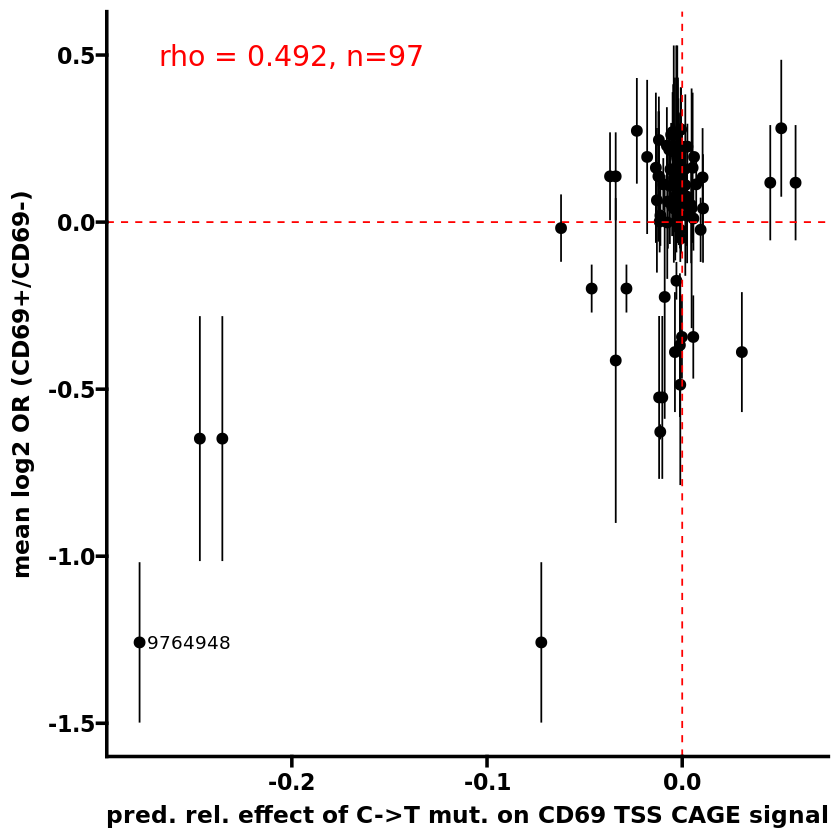

In [27]:
library("ggrepel")
ggplot(experiment_C_T_g,aes(x=out_mean_diff,y=mean_OR, label=base_annotation)) + 
                  geom_pointrange(aes(ymin = mean_OR - sd_OR,
                                    ymax = mean_OR + sd_OR)) +
                    geom_hline(yintercept=0,linetype="dashed",color="red") +
                    geom_vline(xintercept=0,linetype="dashed",color="red") + theme_prism() + 
                xlab('pred. rel. effect of C->T mut. on CD69 TSS CAGE signal') + 
                ylab('mean log2 OR (CD69+/CD69-)') + geom_text_repel() +
                annotate("text",x = -0.2, y = 0.5, label = "rho = 0.492, n=97", size=6,color="red")
    

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”


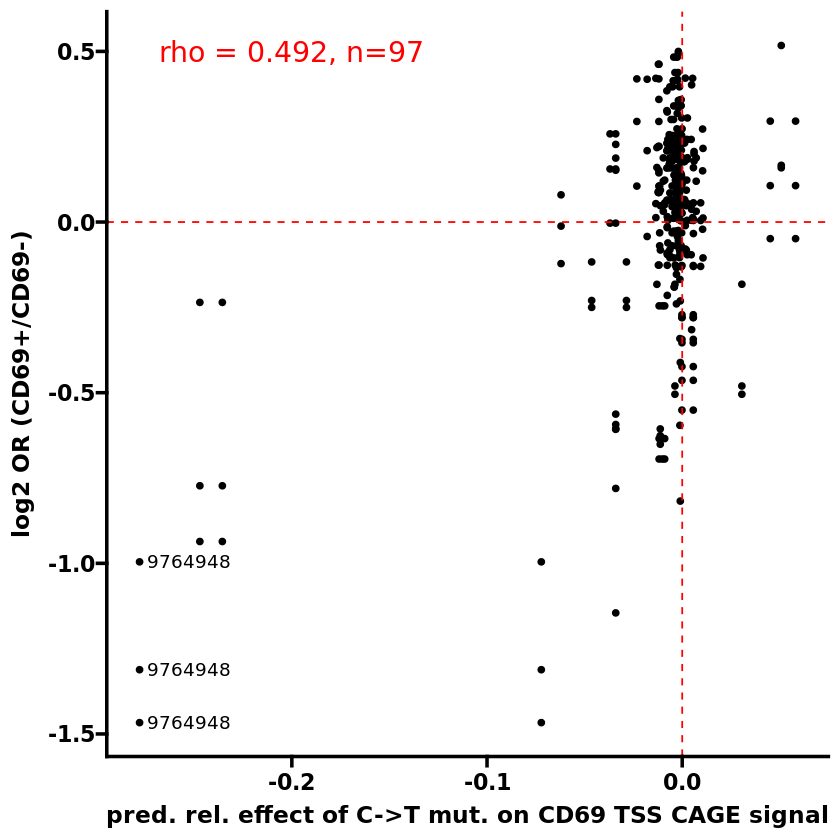

In [25]:
library("ggrepel")
ggplot(experiment_C_T,aes(x=out_mean_diff,y=OR, label=base_annotation)) + 
                  geom_point() + 
                    geom_hline(yintercept=0,linetype="dashed",color="red") +
                    geom_vline(xintercept=0,linetype="dashed",color="red") + theme_prism() + 
                xlab('pred. rel. effect of C->T mut. on CD69 TSS CAGE signal') + 
                ylab('log2 OR (CD69+/CD69-)') + geom_text_repel() +
                annotate("text",x = -0.2, y = 0.5, label = "rho = 0.492, n=97", size=6,color="red")
    